# **Ante & Post Hoc Classification (Combined)**

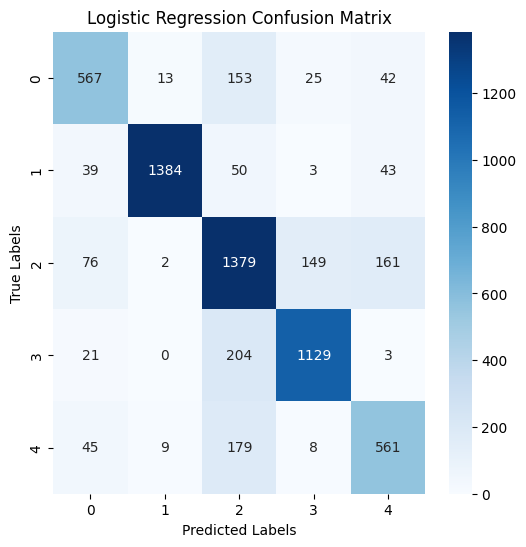

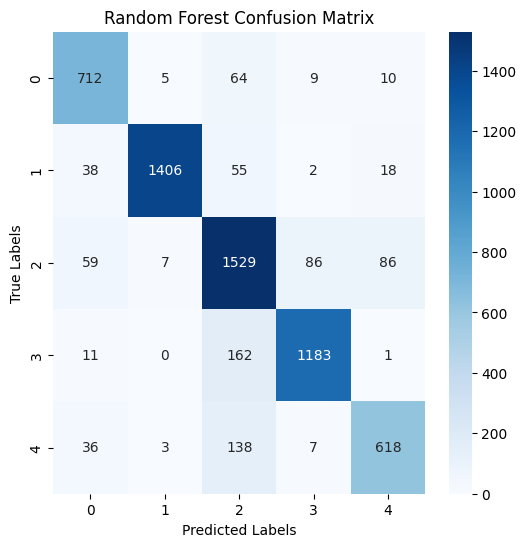

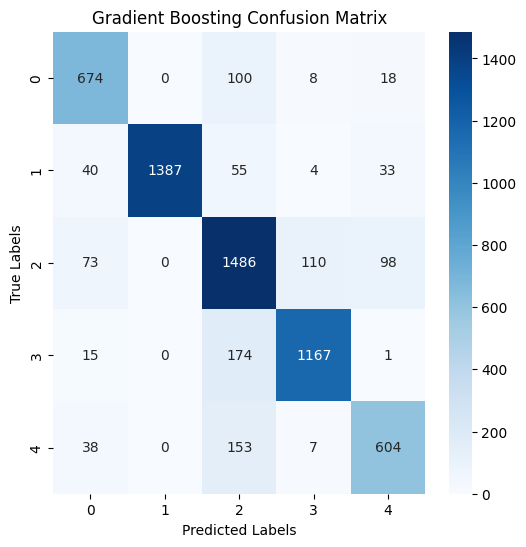

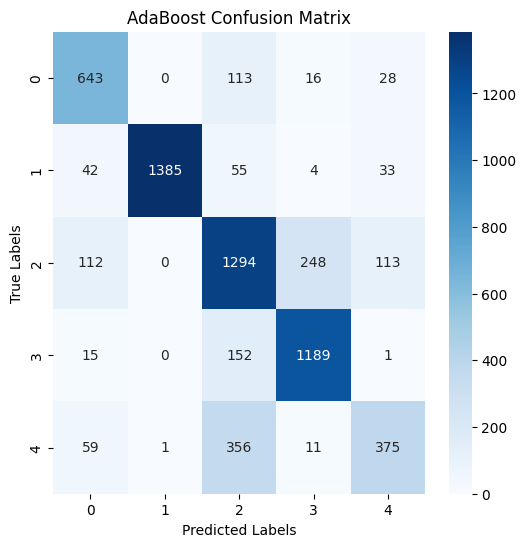

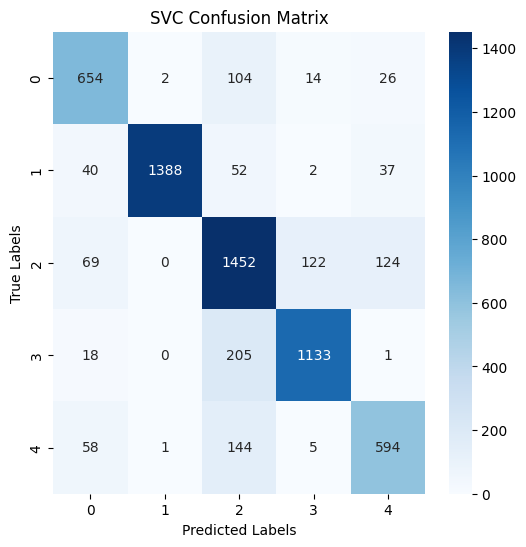

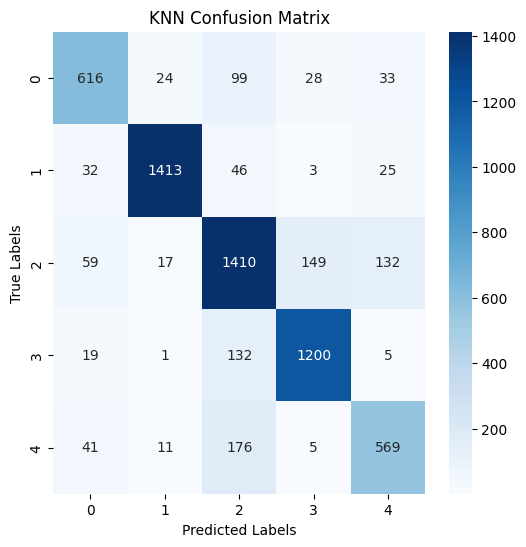

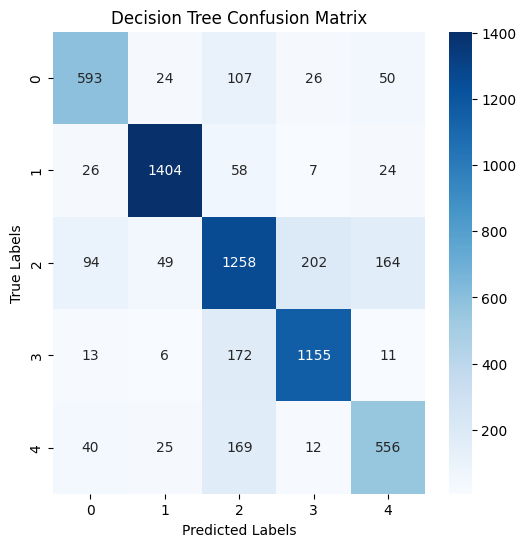

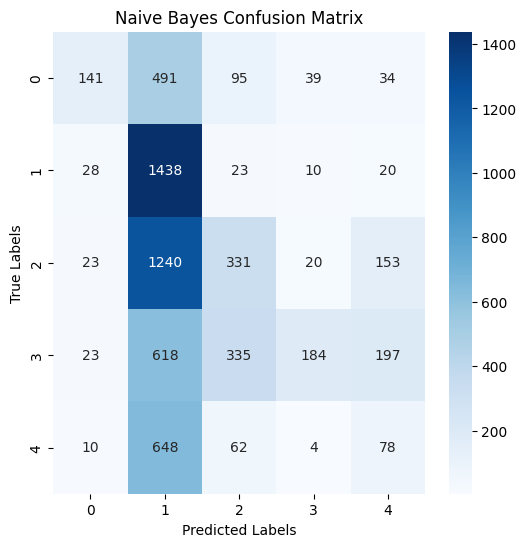

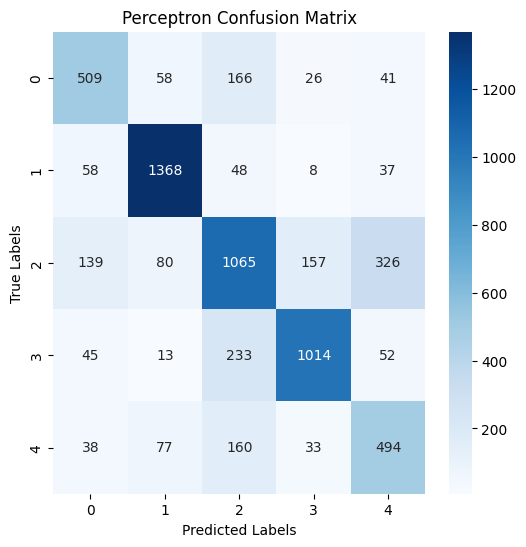

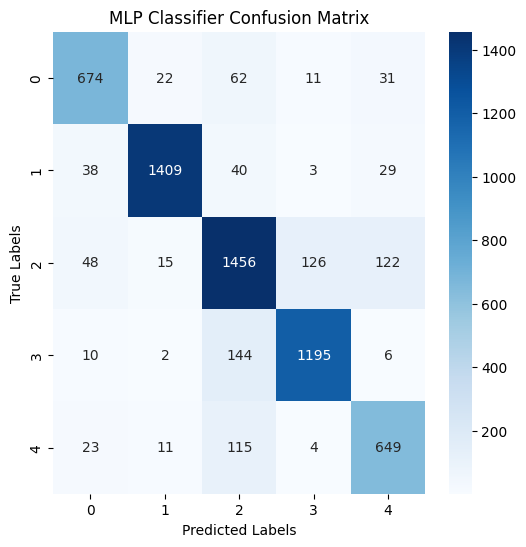

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load and prepare data
df = pd.read_csv('/kaggle/input/features/(Standardized)_All_EEG_EOG_multi_domain_features.csv')
df.dropna(inplace=True)  # Remove rows with missing values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models to be used
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Gaussian Process': GaussianProcessClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('svc', SVC())
    ]),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Initialize a dictionary to store results
results = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Loop through each model
for model_name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Store results
    results['Model'].append(model_name)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['Accuracy'].append(accuracy)
    results['Train Time (s)'].append(train_time)
    results['Prediction Time (s)'].append(pred_time)
    results['Confusion Matrix'].append(conf_matrix)
    results['Classification Report'].append(class_report)

    # Plotting confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Save results to Excel
results_df = pd.DataFrame(results)

# Save confusion matrices to Excel
confusion_matrices_df = pd.DataFrame(results['Confusion Matrix'], index=results['Model'])
confusion_matrices_df.to_excel('/kaggle/working/confusion_matrices.xlsx', index=True)

# Save classification reports to Excel
classification_reports_df = pd.DataFrame(results['Classification Report'], index=results['Model'])
classification_reports_df.to_excel('/kaggle/working/classification_reports.xlsx', index=True)

# Save overall results to Excel
results_df.to_excel('/kaggle/working/ml_models_results.xlsx', index=False)
print("Results saved to Excel files.")



# ML Models(Part I)
Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, SVC, KNN Results

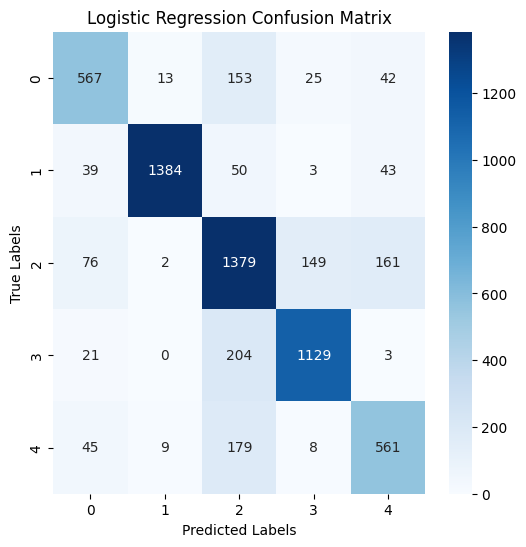

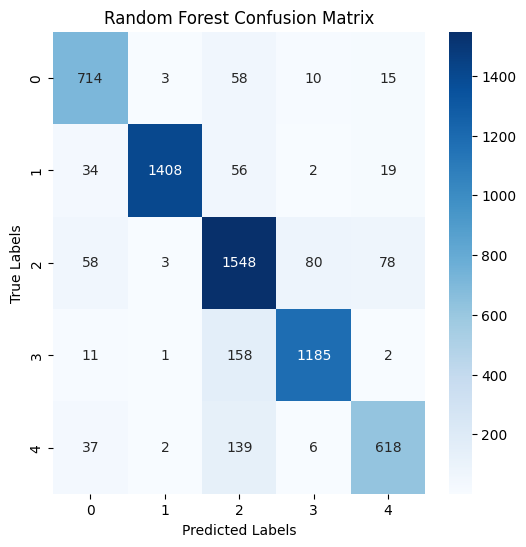

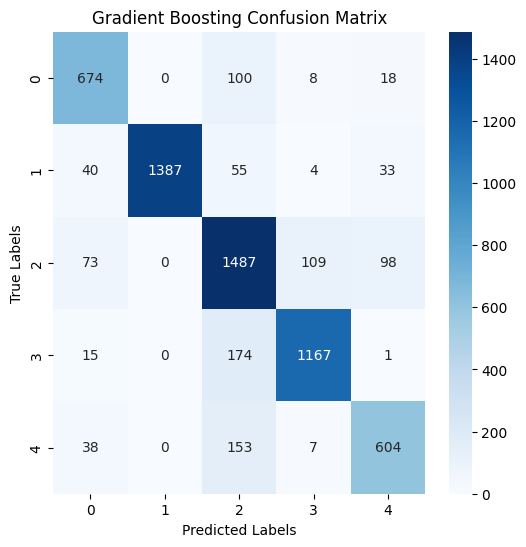

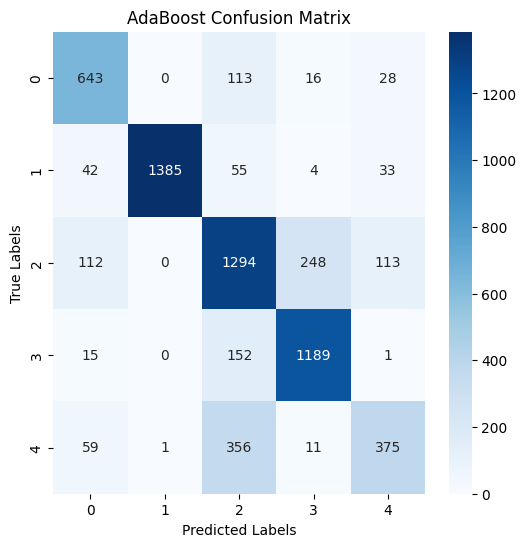

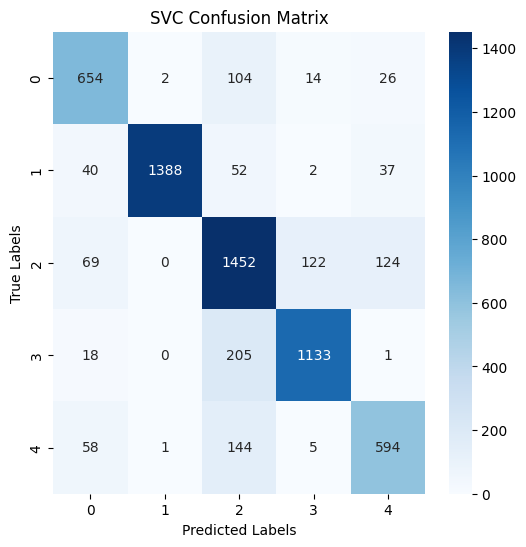

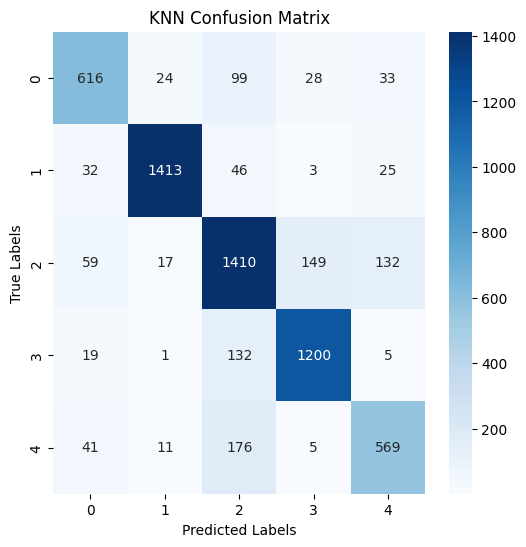

Part 1 results saved to Excel files with separate sheets for confusion matrices and classification reports.


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.w

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load and prepare data
df = pd.read_csv('/kaggle/input/features/(Standardized)_All_EEG_EOG_multi_domain_features.csv')
df.dropna(inplace=True)  # Remove rows with missing values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# First half of models to be used
models_part1 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier()
}

# Initialize a dictionary to store results for the first half
results_part1 = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': [],
    'Confusion Matrix': [],
    'Classification Report': [],
}

# Loop through each model in part 1
for model_name, model in models_part1.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_part1['Model'].append(model_name)
    results_part1['Precision'].append(precision)
    results_part1['Recall'].append(recall)
    results_part1['F1-Score'].append(f1)
    results_part1['Accuracy'].append(accuracy)
    results_part1['Train Time (s)'].append(train_time)
    results_part1['Prediction Time (s)'].append(pred_time)
    results_part1['Confusion Matrix'].append(conf_matrix)
    results_part1['Classification Report'].append(class_report)
    
    # Create a DataFrame for each class's precision, recall, f1-score, and accuracy
    class_metrics = []
    for class_label in class_report.keys():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
            class_metrics.append([
                class_label,
                class_report[class_label]['precision'],
                class_report[class_label]['recall'],
                class_report[class_label]['f1-score'],
                class_report[class_label]['support']
            ])
    
    # Create DataFrame for each class's metrics
    class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    
    # Plotting confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Create an Excel writer object
with pd.ExcelWriter('/kaggle/working/ml_models_results.xlsx') as writer:
    # Save results for part 1
    results_part1_df = pd.DataFrame(results_part1)
    results_part1_df.to_excel(writer, sheet_name='Metrics', index=False)

    # Save confusion matrices for part 1 (keeping them in matrix form)
    for model_name, conf_matrix in zip(results_part1['Model'], results_part1['Confusion Matrix']):
        matrix_df = pd.DataFrame(conf_matrix)
        matrix_df.to_excel(writer, sheet_name=f'{model_name} Confusion Matrix', index=False)

    # Save classification reports for part 1
    for model_name, class_report in zip(results_part1['Model'], results_part1['Classification Report']):
        # Convert the class report to a DataFrame and save each model's report
        class_report_df = pd.DataFrame(class_report).transpose()
        class_report_df.to_excel(writer, sheet_name=f'{model_name} Classification Report', index=True)

    # Save individual class metrics for each model
    for model_name, class_report in zip(results_part1['Model'], results_part1['Classification Report']):
        # Create DataFrame for each class's metrics (precision, recall, F1, accuracy)
        class_metrics = []
        for class_label in class_report.keys():
            if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
                class_metrics.append([
                    class_label,
                    class_report[class_label]['precision'],
                    class_report[class_label]['recall'],
                    class_report[class_label]['f1-score'],
                    class_report[class_label]['support']
                ])
        class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
        class_metrics_df.to_excel(writer, sheet_name=f'{model_name} Class Metrics', index=False)

print("Part 1 results saved to Excel files with separate sheets for confusion matrices and classification reports.")


# ML Models(Part II)
Perceptron and MLP Classification Results

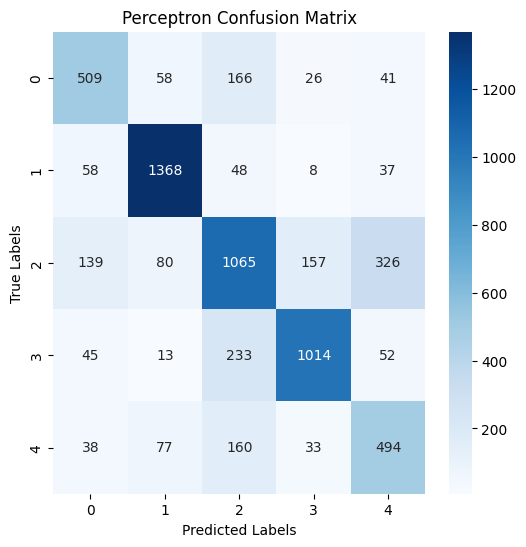

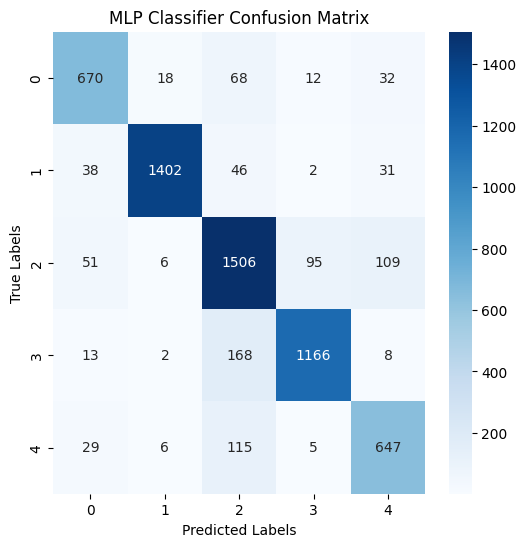

Part 2 results saved to Excel files with separate sheets for confusion matrices and classification reports.


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset again
df = pd.read_csv('/kaggle/input/features/(Standardized)_All_EEG_EOG_multi_domain_features.csv')
df.dropna(inplace=True)  # Remove rows with missing values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second half of models to be used
models_part2 = {
    'Perceptron': Perceptron(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
}

# Initialize a dictionary to store results for part 2
results_part2 = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Loop through each model in part 2
for model_name, model in models_part2.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_part2['Model'].append(model_name)
    results_part2['Precision'].append(precision)
    results_part2['Recall'].append(recall)
    results_part2['F1-Score'].append(f1)
    results_part2['Accuracy'].append(accuracy)
    results_part2['Train Time (s)'].append(train_time)
    results_part2['Prediction Time (s)'].append(pred_time)
    results_part2['Confusion Matrix'].append(conf_matrix)
    results_part2['Classification Report'].append(class_report)
    
    # Create a DataFrame for each class's precision, recall, f1-score, and support
    class_metrics = []
    for class_label in class_report.keys():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
            class_metrics.append([
                class_label,
                class_report[class_label]['precision'],
                class_report[class_label]['recall'],
                class_report[class_label]['f1-score'],
                class_report[class_label]['support']
            ])
    
    # Create DataFrame for each class's metrics
    class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    
    # Plotting confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Create an Excel writer object
with pd.ExcelWriter('/kaggle/working/ml_models_part2_results.xlsx') as writer:
    # Save results for part 2
    results_part2_df = pd.DataFrame(results_part2)
    results_part2_df.to_excel(writer, sheet_name='Metrics', index=False)

    # Save confusion matrices for part 2 (keeping them in matrix form)
    for model_name, conf_matrix in zip(results_part2['Model'], results_part2['Confusion Matrix']):
        matrix_df = pd.DataFrame(conf_matrix)
        matrix_df.to_excel(writer, sheet_name=f'{model_name} Confusion Matrix', index=False)

    # Save classification reports for part 2
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Convert the class report to a DataFrame and save each model's report
        class_report_df = pd.DataFrame(class_report).transpose()
        class_report_df.to_excel(writer, sheet_name=f'{model_name} Classification Report', index=True)

    # Save individual class metrics for each model
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Create DataFrame for each class's metrics (precision, recall, F1, accuracy)
        class_metrics = []
        for class_label in class_report.keys():
            if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
                class_metrics.append([
                    class_label,
                    class_report[class_label]['precision'],
                    class_report[class_label]['recall'],
                    class_report[class_label]['f1-score'],
                    class_report[class_label]['support']
                ])
        class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
        class_metrics_df.to_excel(writer, sheet_name=f'{model_name} Class Metrics', index=False)

print("Part 2 results saved to Excel files with separate sheets for confusion matrices and classification reports.")


# ML Models(Part III)
Voting Classifier Results

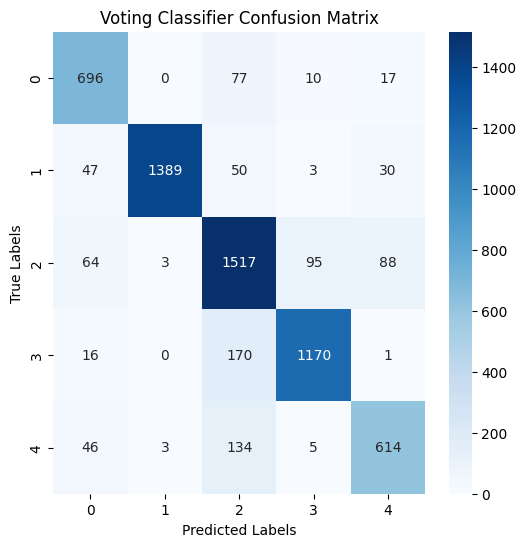

Part 3 results saved to Excel files with separate sheets for confusion matrices and classification reports.


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset again
df = pd.read_csv('/kaggle/input/features/(Standardized)_All_EEG_EOG_multi_domain_features.csv')
df.dropna(inplace=True)  # Remove rows with missing values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second half of models to be used
models_part2 = {
     'Voting Classifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('svc', SVC())
     ])
      }

# Initialize a dictionary to store results for part 2
results_part2 = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Loop through each model in part 2
for model_name, model in models_part2.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_part2['Model'].append(model_name)
    results_part2['Precision'].append(precision)
    results_part2['Recall'].append(recall)
    results_part2['F1-Score'].append(f1)
    results_part2['Accuracy'].append(accuracy)
    results_part2['Train Time (s)'].append(train_time)
    results_part2['Prediction Time (s)'].append(pred_time)
    results_part2['Confusion Matrix'].append(conf_matrix)
    results_part2['Classification Report'].append(class_report)
    
    # Create a DataFrame for each class's precision, recall, f1-score, and support
    class_metrics = []
    for class_label in class_report.keys():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
            class_metrics.append([
                class_label,
                class_report[class_label]['precision'],
                class_report[class_label]['recall'],
                class_report[class_label]['f1-score'],
                class_report[class_label]['support']
            ])
    
    # Create DataFrame for each class's metrics
    class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    
    # Plotting confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Create an Excel writer object
with pd.ExcelWriter('/kaggle/working/ml_models_part3_results.xlsx') as writer:
    # Save results for part 2
    results_part2_df = pd.DataFrame(results_part2)
    results_part2_df.to_excel(writer, sheet_name='Metrics', index=False)

    # Save confusion matrices for part 2 (keeping them in matrix form)
    for model_name, conf_matrix in zip(results_part2['Model'], results_part2['Confusion Matrix']):
        matrix_df = pd.DataFrame(conf_matrix)
        matrix_df.to_excel(writer, sheet_name=f'{model_name} Confusion Matrix', index=False)

    # Save classification reports for part 2
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Convert the class report to a DataFrame and save each model's report
        class_report_df = pd.DataFrame(class_report).transpose()
        class_report_df.to_excel(writer, sheet_name=f'{model_name} Classification Report', index=True)

    # Save individual class metrics for each model
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Create DataFrame for each class's metrics (precision, recall, F1, accuracy)
        class_metrics = []
        for class_label in class_report.keys():
            if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
                class_metrics.append([
                    class_label,
                    class_report[class_label]['precision'],
                    class_report[class_label]['recall'],
                    class_report[class_label]['f1-score'],
                    class_report[class_label]['support']
                ])
        class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
        class_metrics_df.to_excel(writer, sheet_name=f'{model_name} Class Metrics', index=False)

print("Part 3 results saved to Excel files with separate sheets for confusion matrices and classification reports.")


# ML Models(Part IV)
XGBoost, LightGBM, CatBoost Classification Results

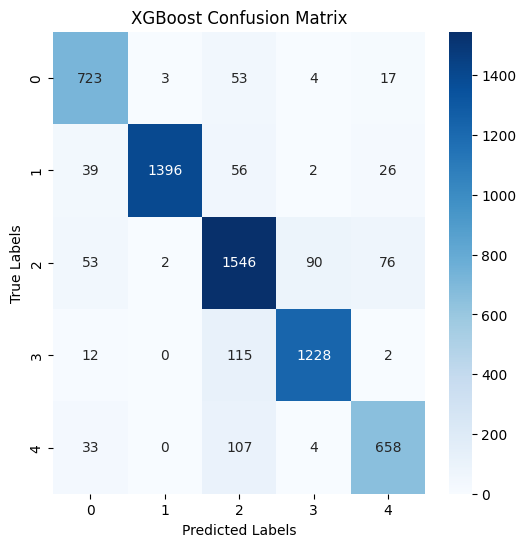

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16914
[LightGBM] [Info] Number of data points in the train set: 24977, number of used features: 68
[LightGBM] [Info] Start training from score -2.023124
[LightGBM] [Info] Start training from score -1.428031
[LightGBM] [Info] Start training from score -1.257016
[LightGBM] [Info] Start training from score -1.521056
[LightGBM] [Info] Start training from score -2.079482


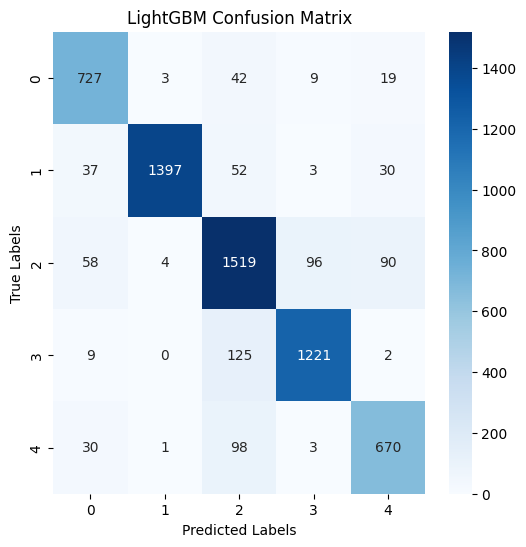

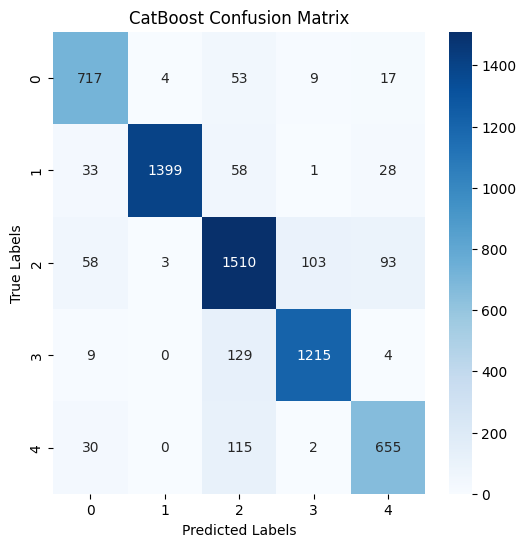

Part 3 results saved to Excel files with separate sheets for confusion matrices and classification reports.


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset again
df = pd.read_csv('/kaggle/input/features/(Standardized)_All_EEG_EOG_multi_domain_features.csv')
df.dropna(inplace=True)  # Remove rows with missing values
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second half of models to be used
models_part2 = {
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
      }

# Initialize a dictionary to store results for part 2
results_part2 = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': [],
    'Confusion Matrix': [],
    'Classification Report': []
}

# Loop through each model in part 2
for model_name, model in models_part2.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store results
    results_part2['Model'].append(model_name)
    results_part2['Precision'].append(precision)
    results_part2['Recall'].append(recall)
    results_part2['F1-Score'].append(f1)
    results_part2['Accuracy'].append(accuracy)
    results_part2['Train Time (s)'].append(train_time)
    results_part2['Prediction Time (s)'].append(pred_time)
    results_part2['Confusion Matrix'].append(conf_matrix)
    results_part2['Classification Report'].append(class_report)
    
    # Create a DataFrame for each class's precision, recall, f1-score, and support
    class_metrics = []
    for class_label in class_report.keys():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
            class_metrics.append([
                class_label,
                class_report[class_label]['precision'],
                class_report[class_label]['recall'],
                class_report[class_label]['f1-score'],
                class_report[class_label]['support']
            ])
    
    # Create DataFrame for each class's metrics
    class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    
    # Plotting confusion matrix for each model
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Create an Excel writer object
with pd.ExcelWriter('/kaggle/working/ml_models_part4_results.xlsx') as writer:
    # Save results for part 2
    results_part2_df = pd.DataFrame(results_part2)
    results_part2_df.to_excel(writer, sheet_name='Metrics', index=False)

    # Save confusion matrices for part 2 (keeping them in matrix form)
    for model_name, conf_matrix in zip(results_part2['Model'], results_part2['Confusion Matrix']):
        matrix_df = pd.DataFrame(conf_matrix)
        matrix_df.to_excel(writer, sheet_name=f'{model_name} Confusion Matrix', index=False)

    # Save classification reports for part 2
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Convert the class report to a DataFrame and save each model's report
        class_report_df = pd.DataFrame(class_report).transpose()
        class_report_df.to_excel(writer, sheet_name=f'{model_name} Classification Report', index=True)

    # Save individual class metrics for each model
    for model_name, class_report in zip(results_part2['Model'], results_part2['Classification Report']):
        # Create DataFrame for each class's metrics (precision, recall, F1, accuracy)
        class_metrics = []
        for class_label in class_report.keys():
            if class_label not in ['accuracy', 'macro avg', 'weighted avg']:  # Skip averages
                class_metrics.append([
                    class_label,
                    class_report[class_label]['precision'],
                    class_report[class_label]['recall'],
                    class_report[class_label]['f1-score'],
                    class_report[class_label]['support']
                ])
        class_metrics_df = pd.DataFrame(class_metrics, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
        class_metrics_df.to_excel(writer, sheet_name=f'{model_name} Class Metrics', index=False)

print("Part 4 results saved to Excel files with separate sheets for confusion matrices and classification reports.")
